Number of features (original) :  64
Number of features (reduced) :  51
Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters after RandomSearchCV:  {'kernel': 'linear', 'gamma': 0.01, 'C': 0.1}
The best estimator:  SVC(C=0.1, gamma=0.01, kernel='linear')
Classifier report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        88
           1       0.89      0.93      0.91        91
           2       0.95      0.97      0.96        86
           3       0.93      0.87      0.90        91
           4       0.97      0.90      0.93        92
           5       0.87      0.93      0.90        91
           6       0.95      0.95      0.95        91
           7       0.96      0.92      0.94        89
           8       0.89      0.83      0.86        88
           9       0.87      0.91      0.89        92

    accuracy                           0.92       899
   macro avg       0.92      0.92      0.92      

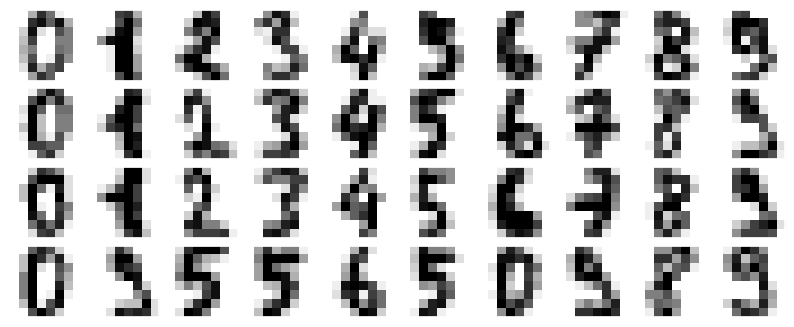

In [ ]:
#provided code

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import datasets, svm, metrics


# The digits dataset
digits = datasets.load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)
#Use PCA to reduce data dimensionality
# add labels
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

labels = list(zip(digits.images, digits.target))
samples = len(digits.images)
data = digits.images.reshape((samples, -1))

X = StandardScaler().fit_transform(data)

z = round(digits.data.shape[1]*.8)
pca = PCA(n_components=z, whiten=True)

X_pca = pca.fit_transform(X)
print('Number of features (original) : ', X.shape[1])
print('Number of features (reduced) : ', X_pca.shape[1])
# linear performance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

parameters = {'C': [0.1,1,10,100],
             'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel': ['linear']}

grid = RandomizedSearchCV(SVC(), parameters, refit = True, verbose = 1, cv = 5)
grid.fit(X_pca[:samples//2], digits.target[:samples//2])

#predict value of digit, second half
expected = digits.target[samples//2:]
predicted = grid.predict(X_pca[samples//2:])

print("The best parameters after RandomSearchCV: ", grid.best_params_)
print("The best estimator: ", grid.best_estimator_)
print("Classifier report:\n%s\n " % (metrics.classification_report(expected, predicted)))
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

parameters = {'C': [0.1,1,10,100],
             'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel': ['rbf']}

grid = RandomizedSearchCV(SVC(), parameters, refit = True, verbose = 1, cv = 5)
grid.fit(X_pca[:samples//2], digits.target[:samples//2])

#predict value of digit, second half
expected = digits.target[samples//2:]
predicted = grid.predict(X_pca[samples//2:])

print("The best parameters after RandomSearchCV: ", grid.best_params_)
print("The best estimator: ", grid.best_estimator_)
print("Classifier report:\n%s\n " % (metrics.classification_report(expected, predicted)))